In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv', header=None, names=['X', 'Y', 'class'])

In [3]:
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


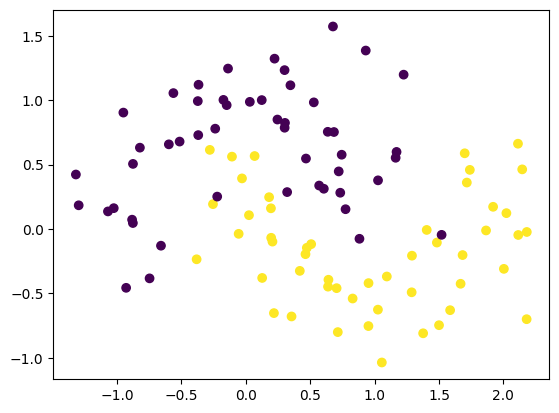

In [4]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [7]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[-0.5317713 , -1.3076428 ,  1.5224003 ,  0.31253397,  1.1332155 ,
         -1.2571795 , -1.3757359 ,  0.9257988 ,  1.3739585 , -0.5070131 ],
        [-0.85910183, -1.2540634 , -1.4924835 ,  1.0628    , -1.3619077 ,
          1.0262212 , -1.3681259 , -1.0662522 ,  0.35459077,  0.5638739 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.39992392, -0.7431183 ,  0.27307594, -0.49920303, -0.5353793 ,
         -0.1930536 ,  0.46479356,  0.6159487 ,  0.41093934, -0.3109422 ],
        [ 0.2322892 , -0.40150434, -0.5096257 , -0.68738407,  0.19735956,
          0.7151259 , -0.40274686,  0.14440638, -0.14108956, -0.33890876],
        [ 0.7480012 , -0.31597155, -0.08589572, -0.34528163, -0.57537836,
         -0.16018862, -0.38283154,  0.17405742,  0.2349801 , -0.51236045],
        [ 0.71437776,  0.6680281 ,  0.12103313, -0.38439798,  0.18694204,
         -0.41822436, -0.07416624, -0.58346546, -0.5816007 , -0.32374004],
        [-0.41944

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1) * np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[ 0.91251034, -0.63663906,  0.5192337 , -0.52062947,  0.05748705,
         -0.11948406,  0.91155416, -0.90398896, -0.31144103, -0.8490903 ],
        [-1.5096508 , -0.17531538, -0.03158022, -0.20251481,  1.0774397 ,
          1.0897523 , -0.8758147 ,  0.96280295,  0.54902834,  0.06597423]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.33313423,  0.01197636, -0.63653517, -0.289353  , -0.2407727 ,
         -0.10009894, -0.5268202 ,  0.22824179,  0.06916769, -0.15489307],
        [ 0.06832256,  0.31342724, -0.26341656,  0.1961417 , -0.16997223,
         -0.19731738, -0.5768994 , -0.29080465, -0.41106662,  0.00750201],
        [ 0.02648348,  0.21646158, -0.14585088, -0.20215963,  0.04949393,
          0.25397444,  0.02119267,  0.1398777 , -0.03774211, -0.22372146],
        [ 0.49411467, -0.04082995,  0.3746465 , -0.25674677, -0.35550168,
         -0.00370357,  0.01166762, -0.25561428,  0.42676616,  0.33250478],
        [-0.02707

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X, Y, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.6258 - loss: 0.7054 - val_accuracy: 0.7500 - val_loss: 0.6661
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6703 - loss: 0.6920 - val_accuracy: 0.8000 - val_loss: 0.6554
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7055 - loss: 0.6745 - val_accuracy: 0.8000 - val_loss: 0.6450
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7078 - loss: 0.6682 - val_accuracy: 0.8000 - val_loss: 0.6348
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7234 - loss: 0.6568 - val_accuracy: 0.8000 - val_loss: 0.6245
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7563 - loss: 0.6399 - val_accuracy: 0.8000 - val_loss: 0.6137
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7133 - loss: 0.6359 - val_accuracy: 0.8500 - val_loss: 0.6025
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6961 - loss: 0.6324 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

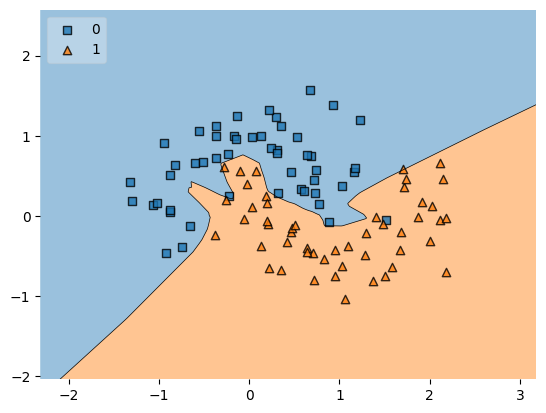

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y.astype('int'), clf=model, legend=2)